# Importing the required libraries

In [1]:
import re
import nltk
import pandas as pd
import numpy as np
import emoji
from collections import Counter
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Definition of Functions

In [2]:
# Extract Time
def date_time(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -'
    result = re.match(pattern, s)
    if result:
        return True
    return False

# Find Authors or Contacts
def find_author(s):
    s = s.split(":")
    if len(s)==2:
        return True
    else:
        return False

# Finding Messages
def getDatapoint(line):
    splitline = line.split(' - ')
    dateTime = splitline[0]
    date, time = dateTime.split(", ")
    message = " ".join(splitline[1:])
    if find_author(message):
        splitmessage = message.split(": ")
        author = splitmessage[0]
        message = " ".join(splitmessage[1:])
    else:
        author= None
    return date, time, author, message

In [3]:
data = []
conversation = 'WhatsApp Chat with 🐛🔥 Boys.txt'
with open(conversation, encoding="utf-8") as fp:
    fp.readline()
    messageBuffer = []
    date, time, author = None, None, None
    while True:
        line = fp.readline()
        if not line:
            break
        line = line.strip()
        if date_time(line):
            if len(messageBuffer) > 0:
                data.append([date, time, author, ' '.join(messageBuffer)])
            messageBuffer.clear()
            date, time, author, message = getDatapoint(line)
            messageBuffer.append(message)
        else:
            messageBuffer.append(line)

# Analyse the Sentiments

In [4]:

df = pd.DataFrame(data, columns=["Date", 'Time', 'Author', 'Message'])
df['Date'] = pd.to_datetime(df['Date'])
data = df.dropna()

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["Message"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["Message"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["Message"]]
print(data.head())

/var/folders/z4/c1d3c99n1s37vl3h8kllltwh0000gn/T/ipykernel_15955/145729565.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["Message"]]
/var/folders/z4/c1d3c99n1s37vl3h8kllltwh0000gn/T/ipykernel_15955/145729565.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["Message"]]


        Date     Time     Author                               Message  \
2 2021-06-25  9:20 PM  Dharanesh                                Yen da   
3 2021-06-25  9:59 PM  Dharanesh                                   Dei   
4 2021-06-25  9:59 PM  Dharanesh  Epdi reappear exam ku apply panradhu   
5 2021-06-26  5:38 PM     Nivash                             Therliye😷   
6 2021-06-26  5:38 PM     Nivash            Dei drive link share panra   

   Positive  Negative  Neutral  
2     0.000       0.0    1.000  
3     0.000       0.0    1.000  
4     0.000       0.0    1.000  
5     0.000       0.0    1.000  
6     0.355       0.0    0.645  


/var/folders/z4/c1d3c99n1s37vl3h8kllltwh0000gn/T/ipykernel_15955/145729565.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["Message"]]


In [5]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


In [6]:
media_messages = df[df['Message'] == 'Ok'].shape[0]
print(media_messages)

12


In [7]:
def split_count(text):

    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI for char in word):
            emoji_list.append(word)

    return emoji_list

In [8]:
import regex
df["emoji"] = df["Message"].apply(split_count)
emojis = sum(df['emoji'].str.len())
df.head(50)

AttributeError: module 'emoji' has no attribute 'UNICODE_EMOJI'

In [9]:
total_emojis_list = list([a for b in df.emoji for a in b])
emoji_dict = dict(Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
for i in emoji_dict:
  print(i)

AttributeError: 'DataFrame' object has no attribute 'emoji'

There are 366786 words in all the messages.


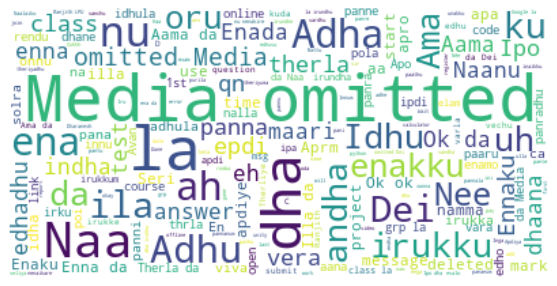

In [10]:
text = " ".join(review for review in df.Message)
print ("There are {} words in all the messages.".format(len(text)))
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [11]:
! git clone https://github.com/amueller/word_cloud.git
% cd word_cloud
! pip install .

xcode-select: note: no developer tools were found at '/Applications/Xcode.app', requesting install. Choose an option in the dialog to download the command line developer tools.


UsageError: Line magic function `%` not found.
